# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


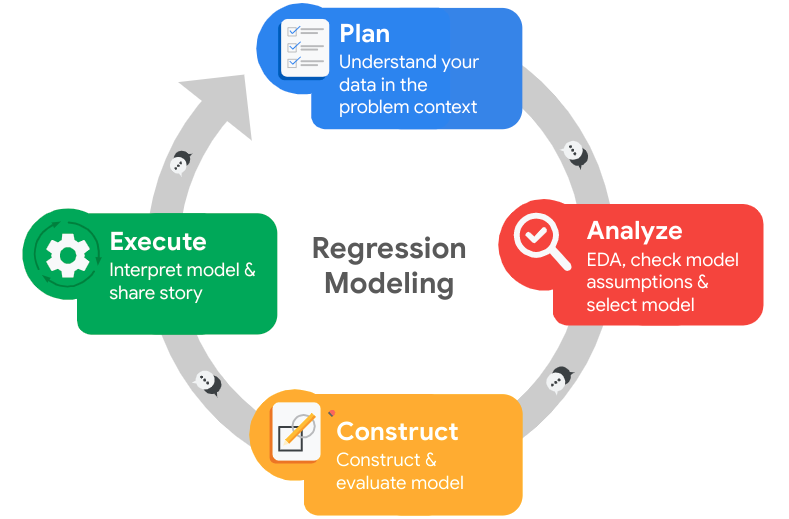

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(8)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [17]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [4]:
# Rename columns as needed
### YOUR CODE HERE ###

#Case correction: Work_accident to work_accident
df0 = df0.rename(columns={'Work_accident' : 'work_accident'})

#Case correction: Department to department
df0 = df0.rename(columns={'Department' : 'department'})

#For clarity: number_project to n_projects
df0 = df0.rename(columns={'number_project' : 'n_projects'})

#Spelling correction: average_montly_hours to average_monthly_hours
df0 = df0.rename(columns={'average_montly_hours' : 'average_monthly_hours'})

#For clarity: time_spend_company to years_tenure
df0 = df0.rename(columns={'time_spend_company' : 'years_tenure'})

#For clarity: left to left_company
df0 = df0.rename(columns={'left' : 'left_company'})

#Formatting: promotion_last_5years to promotion_last5years
df0 = df0.rename(columns={'promotion_last_5years' : 'promotion_last5years'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns



Index(['satisfaction_level', 'last_evaluation', 'n_projects',
       'average_monthly_hours', 'years_tenure', 'work_accident',
       'left_company', 'promotion_last5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [10]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
n_projects               0
average_monthly_hours    0
years_tenure             0
work_accident            0
left_company             0
promotion_last5years     0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [13]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [14]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,n_projects,average_monthly_hours,years_tenure,work_accident,left_company,promotion_last5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [5]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,n_projects,average_monthly_hours,years_tenure,work_accident,left_company,promotion_last5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

Text(0.5, 1.0, 'Tenure at Salifort Motors')

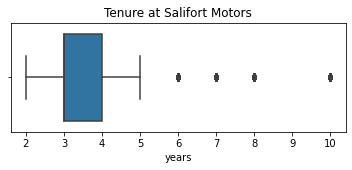

In [5]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(6,2))
box = sns.boxplot(x=df1['years_tenure'])
g=plt.gca()
plt.xlabel('years')
plt.title('Tenure at Salifort Motors')


In [6]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
percentile25 = df1['years_tenure'].quantile(0.25)
percentile75 = df1['years_tenure'].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

#df0[df0['years_tenure'] < lower_limit]

df0[df0['years_tenure'] > upper_limit]


,satisfaction_level,last_evaluation,n_projects,average_monthly_hours,years_tenure,work_accident,left_company,promotion_last5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
14942,0.20,0.50,5,135,6,0,1,0,RandD,low
14947,0.91,0.98,4,242,6,0,1,0,support,low
14977,0.81,0.85,4,251,6,0,1,0,hr,medium
14986,0.85,0.85,4,247,6,0,1,0,technical,low


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]


Some purposes of EDA before constructing a predictive model include:
 Discovery: Familiarize yourself with the data so you can conceptualize its use.
 Structure: Organize or transform the raw data to be more easily visualized, explained, modeled.
 Clean: Remove errors that would distort your data or decrease its usefulness.
 Join: Augment or adjust data by adding values from other datasets.
 Validate: Verify that the data is consistent and high quality.
 Present: Make your cleaned data and visualizations available to others for analysis or for future modeling. 



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [6]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left_company'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###

print('Employees who left: ', (df1['left_company'] == 1).sum() / ((df1['left_company'] == 0).sum() + (df1['left_company'] == 1).sum())*100, '%') 

print('Employees who stayed: ', (df1['left_company'] == 0).sum() / ((df1['left_company'] == 0).sum() + (df1['left_company'] == 1).sum())*100, '%') 


0    10000
1     1991
Name: left_company, dtype: int64
Employees who left:  16.604119756484028 %
Employees who stayed:  83.39588024351598 %


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [7]:
dfleft = df1[df1['left_company'] == 1]
dfstay = df1[df1['left_company'] == 0]

print(dfleft.shape, dfstay.shape)

(1991, 10) (10000, 10)


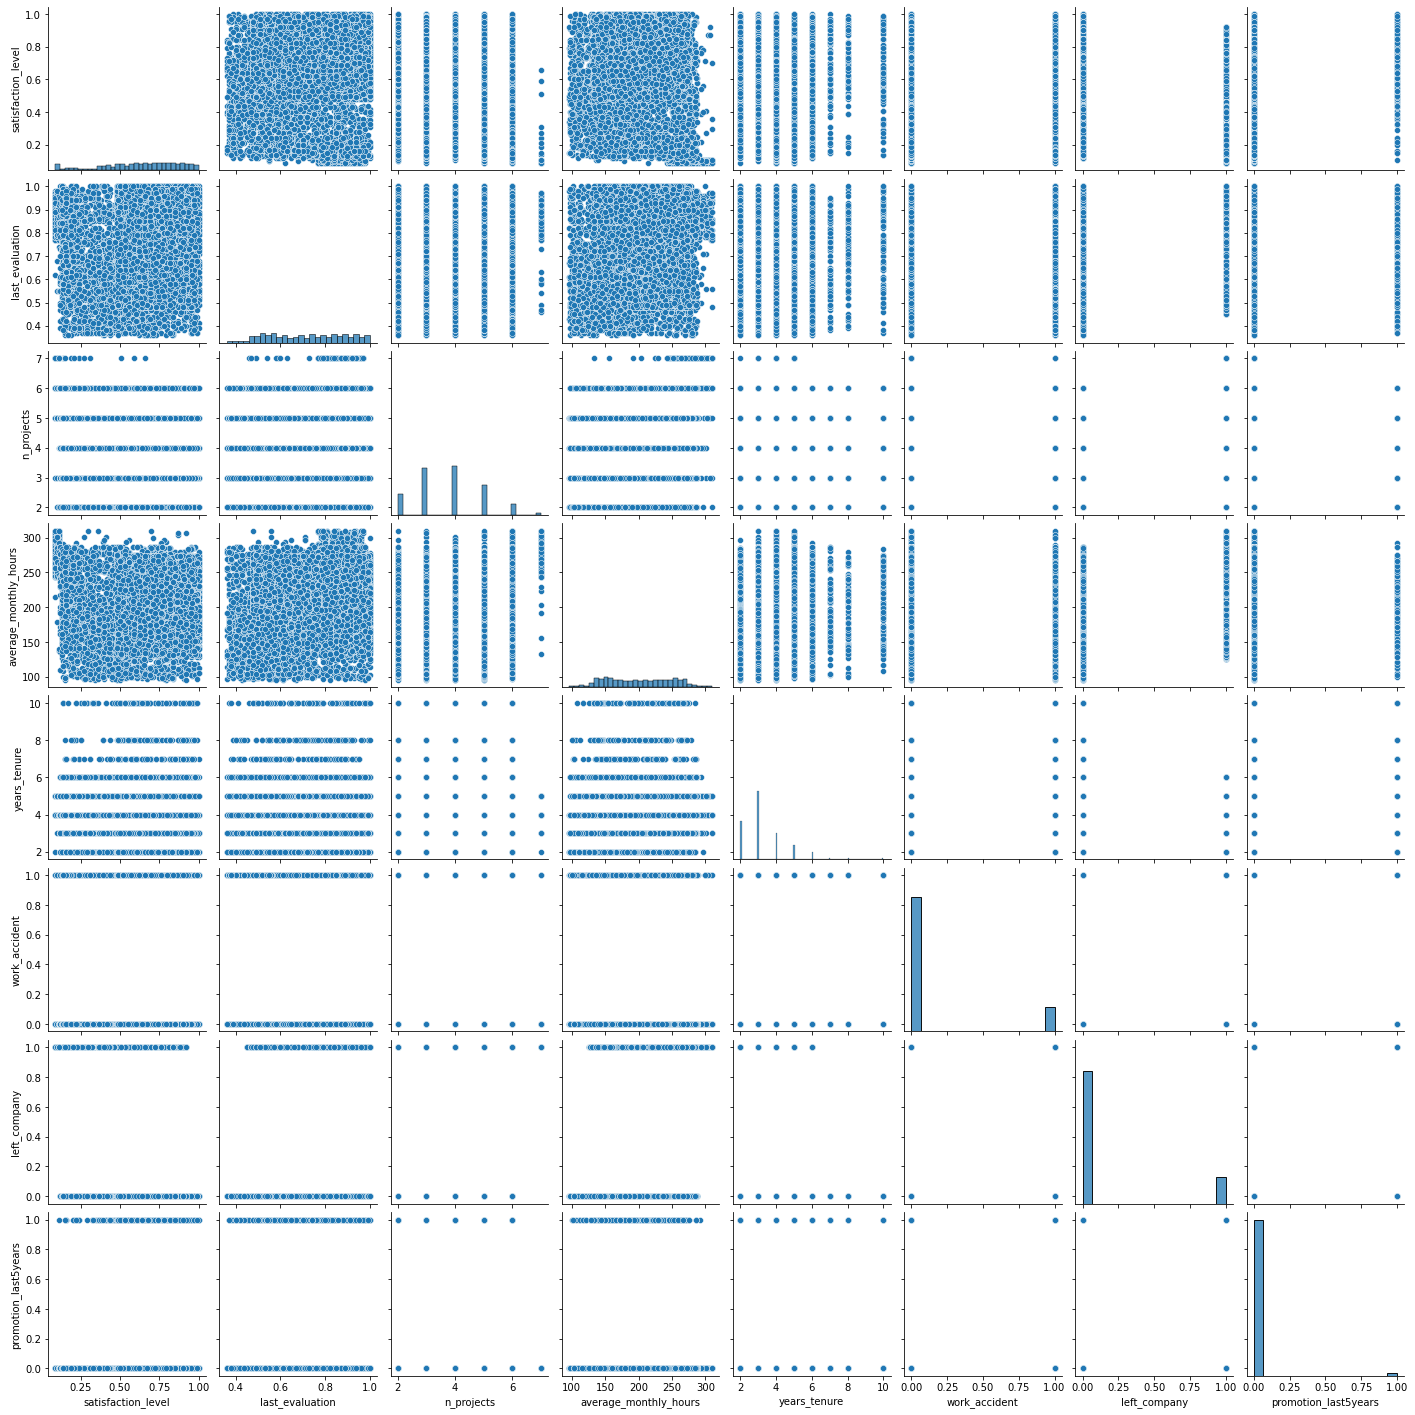

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.pairplot(df1)

Text(0.5, 1.0, 'Hours Worked: Stayed at Company vs. Left Company')

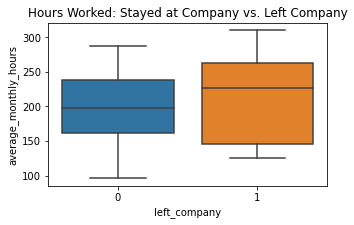

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(5,3))
sns.boxplot(x="left_company", y="average_monthly_hours", data=df1)
plt.title('Hours Worked: Stayed at Company vs. Left Company')

Text(0.5, 1.0, 'Employee Satisfaction Level: Stayed vs. Left Company')

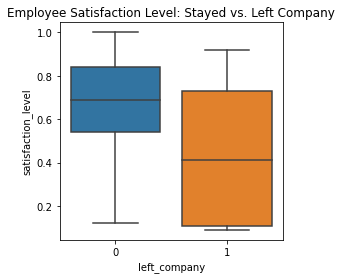

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(4,4))
sns.boxplot(x="left_company", y="satisfaction_level", data=df1)
plt.title('Employee Satisfaction Level: Stayed vs. Left Company')


Text(0.5, 1.0, 'Last Evaluation: Stayed vs. Left Company')

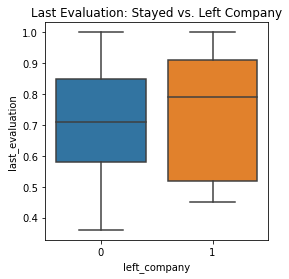

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(4,4))
sns.boxplot(x="left_company", y="last_evaluation", data=df1)
plt.title('Last Evaluation: Stayed vs. Left Company')

Text(0.5, 1.0, 'Employee Satisfaction Level: Salary')

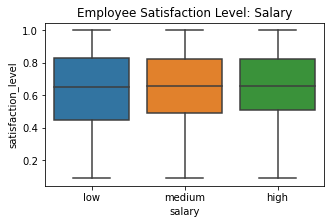

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(5,3))
sns.boxplot(x="salary", y="satisfaction_level", data=df1)
plt.title('Employee Satisfaction Level: Salary')

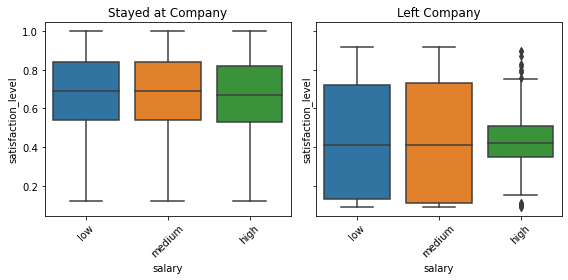

In [26]:
fig, axes = plt.subplots(1,2, figsize=(8,4), sharey=True)

sns.boxplot(x='salary', y='satisfaction_level', data=dfstay, ax=axes[0])
axes[0].set_title('Stayed at Company')

sns.boxplot(x='salary', y='satisfaction_level', data=dfleft, ax=axes[1])
axes[1].set_title('Left Company')

axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

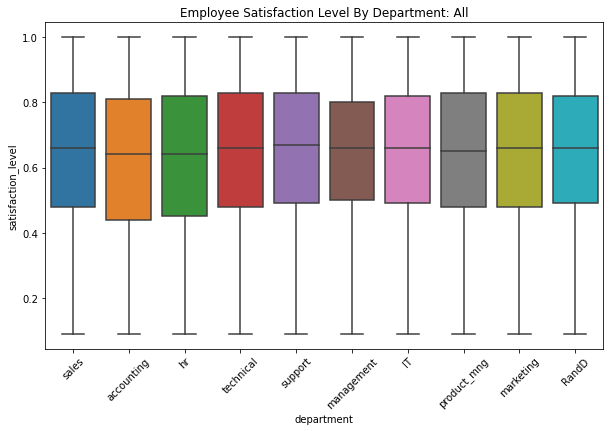

In [27]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10,6))
sns.boxplot(x="department", y="satisfaction_level", data=df1)
plt.title('Employee Satisfaction Level By Department: All')
plt.xticks(rotation=45)
plt.show()

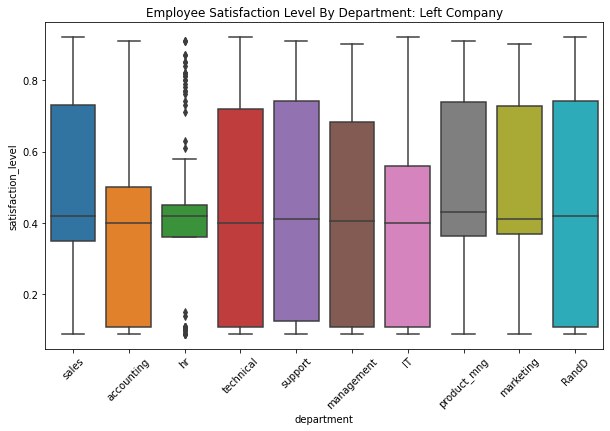

In [28]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10,6))
sns.boxplot(x="department", y="satisfaction_level", data=dfleft)
plt.title('Employee Satisfaction Level By Department: Left Company')
plt.xticks(rotation=45)
plt.show()

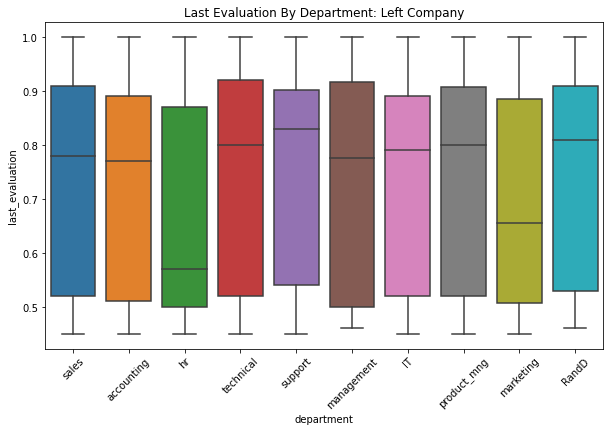

In [13]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10,6))
sns.boxplot(x="department", y="last_evaluation", data=dfleft)
plt.title('Last Evaluation By Department: Left Company')
plt.xticks(rotation=45)
plt.show()


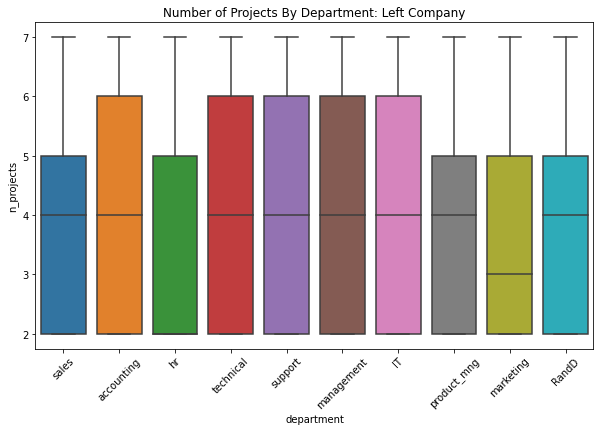

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10,6))
sns.boxplot(x="department", y="n_projects", data=dfleft)
plt.title('Number of Projects By Department: Left Company')
plt.xticks(rotation=45)
plt.show()

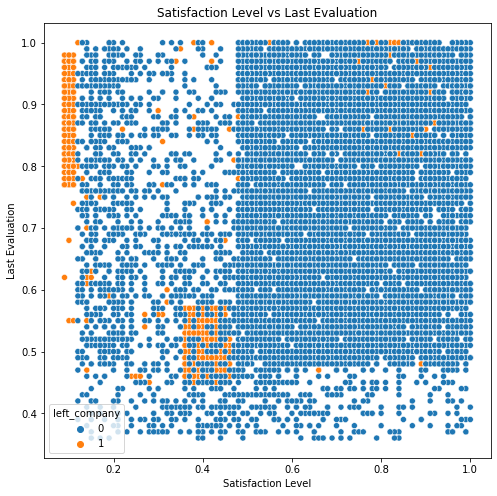

In [37]:
plt.figure(figsize=(8, 8))

# Create a scatterplot
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='left_company', data=df1)

# Add a title and labels
plt.title('Satisfaction Level vs Last Evaluation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')

# Show the plot
plt.show()

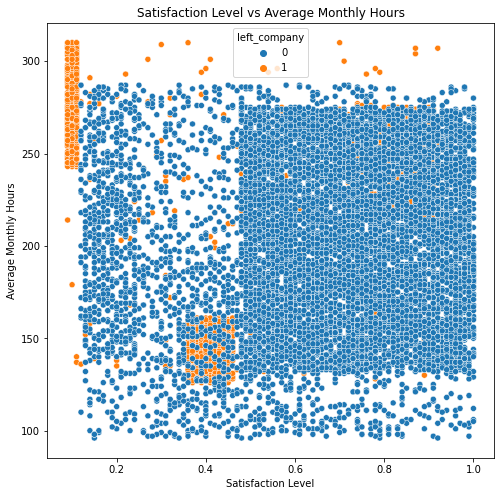

In [36]:
plt.figure(figsize=(8, 8))

# Create a scatterplot
sns.scatterplot(x='satisfaction_level', y='average_monthly_hours', hue='left_company', data=df1)

# Add a title and labels
plt.title('Satisfaction Level vs Average Monthly Hours')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly Hours')

# Show the plot
plt.show()

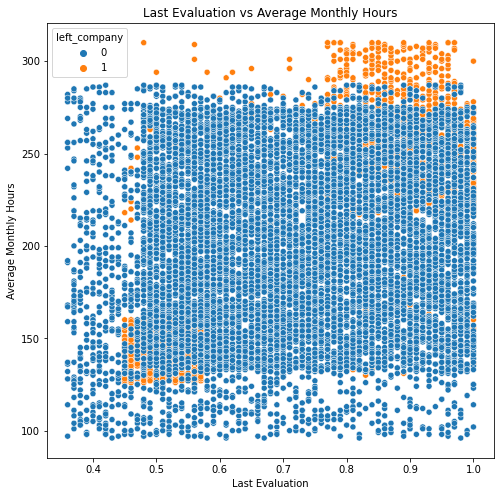

In [35]:
plt.figure(figsize=(8, 8))

# Create a scatterplot
sns.scatterplot(x='last_evaluation', y='average_monthly_hours', hue='left_company', data=df1)

# Add a title and labels
plt.title('Last Evaluation vs Average Monthly Hours')
plt.xlabel('Last Evaluation')
plt.ylabel('Average Monthly Hours')

# Show the plot
plt.show()

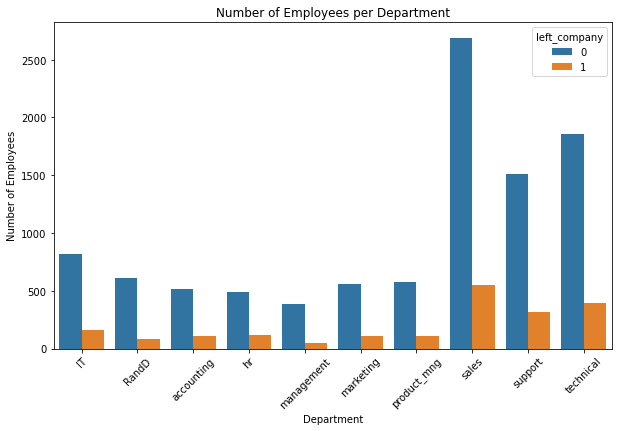

In [29]:
grouped_data = df1.groupby(['department', 'left_company']).size().reset_index(name='employee_count')

plt.figure(figsize=(10,6))
sns.barplot(x='department', y='employee_count', hue='left_company', data=grouped_data)

plt.title('Number of Employees per Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')

plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Employee Satisfaction Level: No Accident vs. Work Accident')

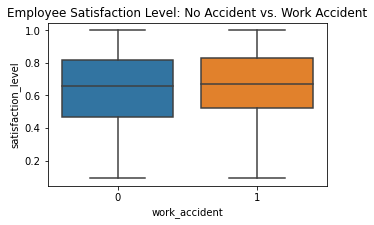

In [30]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(5,3))
sns.boxplot(x="work_accident", y="satisfaction_level", data=df1)
plt.title('Employee Satisfaction Level: No Accident vs. Work Accident')

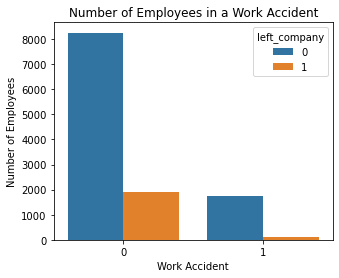

In [13]:
grouped_data6 = df1.groupby(['work_accident', 'left_company']).size().reset_index(name='employee_count')

plt.figure(figsize=(5,4))
sns.barplot(x='work_accident', y='employee_count', hue='left_company', data=grouped_data6)

plt.title('Number of Employees in a Work Accident')
plt.xlabel('Work Accident')
plt.ylabel('Number of Employees')

plt.show()

Text(0.5, 1.0, 'Employee Satisfaction Level: Number of Projects')

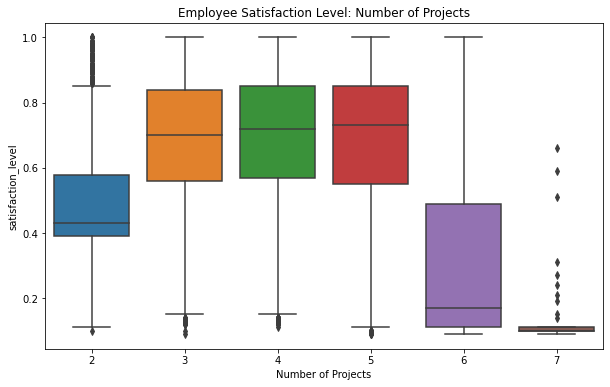

In [103]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10,6))
sns.boxplot(x="n_projects", y="satisfaction_level", data=df1)
plt.xlabel('Number of Projects')
plt.title('Employee Satisfaction Level: Number of Projects')

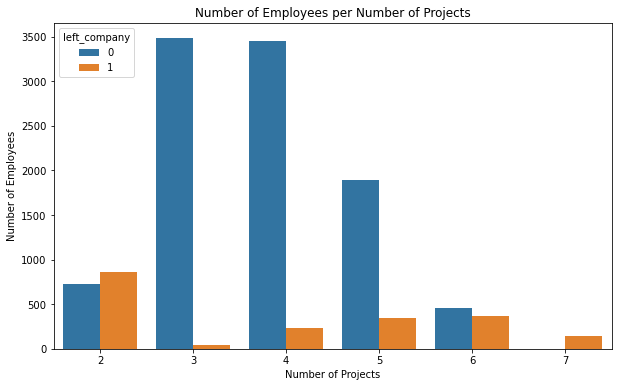

In [10]:
grouped_data2 = df1.groupby(['n_projects', 'left_company']).size().reset_index(name='employee_count')

plt.figure(figsize=(10,6))
sns.barplot(x='n_projects', y='employee_count', hue='left_company', data=grouped_data2)

plt.title('Number of Employees per Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')

plt.show()

Text(0.5, 1.0, 'Employee Satisfaction Level: Years at Company')

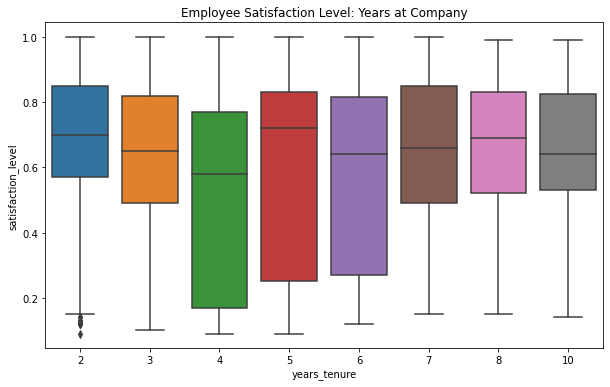

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x="years_tenure", y="satisfaction_level", data=df1)
plt.title('Employee Satisfaction Level: Years at Company')

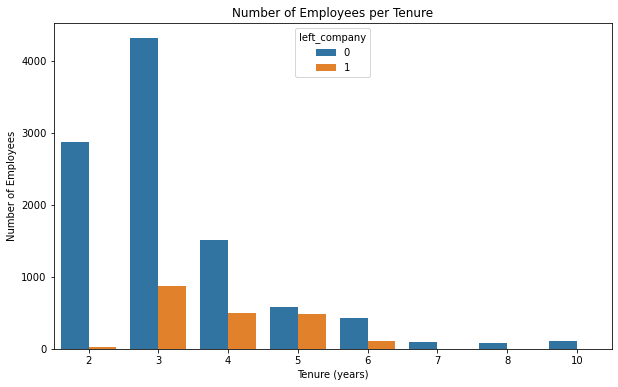

In [34]:
grouped_data3 = df1.groupby(['years_tenure', 'left_company']).size().reset_index(name='employee_count')

plt.figure(figsize=(10,6))
sns.barplot(x='years_tenure', y='employee_count', hue='left_company', data=grouped_data3)

plt.title('Number of Employees per Tenure')
plt.xlabel('Tenure (years)')
plt.ylabel('Number of Employees')

plt.show()

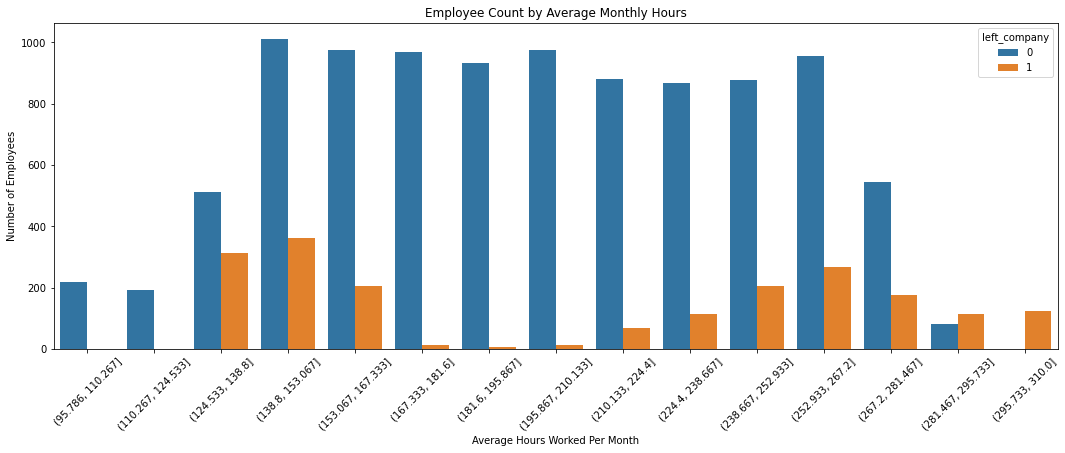

In [35]:
bins = pd.cut(df1['average_monthly_hours'], bins=15)

grouped_data4 = df1.groupby([bins, 'left_company']).size().reset_index(name='employee_count')

grouped_data4.rename(columns={'average_monthly_hours': 'hours_bin'}, inplace=True)

plt.figure(figsize=(18, 6))  
sns.barplot(x='hours_bin', y='employee_count', hue='left_company', data=grouped_data4)

plt.title('Employee Count by Average Monthly Hours')
plt.xlabel('Average Hours Worked Per Month')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

In general, employees who left the company had lower average satisfaction level.

Salary (low, medium, high) did not seem to affect satisfaction level or employee churn/retention. Work accidents did not seem to affect employee satisfaction.

The employees who left the company were quite evenly distributed across all departments. The mean satisfaction level scores were pretty even throughout all the departments, but some departments had uneven distribution of satisfaction level. The Sales team, Support staff, Product management, and marketing teams skewed towards higher satisfaction levels, while Accounting skewed towards lower satisfaction levels. HR had a very narrow interquartile range between ~0.37 and 0.5, while the Technical team, Management, IT, and R&D had a very wide interquartile range, between ~0.05 and 0.7. 

The number of projects that employees worked on seemed to be related to satisfaction level. Employees who worked on 3-5 projects averaged a satisfaction level of ~0.7, while employees who did only 2 projects had satisfaction level of ~0.43, and employees who worked on 6+ projects averaged satisfaction of below 0.1. When looking at the breakdown of employees who left vs. stayed, there's a higher number of employees who left the company when they were working on 2, 6, or 7 projects.

When looking at tenure, there is a very small proportion of employees who left when they were at year 2, or those who worked for the company for 7 or more years. The majority of employees who left were at 3-6 years tenure.

Finally, when looking at hours worked, the distributions of number of employees who left the company versus did not leave the company are quite different. Employees tended to leave when their monthly hours were between 124-167/month (31-42 hours/wk) or if they worked more than 238 hours/month (60+ hours/wk); a much smaller percentage of employees left when they worked between 167-210 hours/month (42-53 hours/wk), suggesting that this is the ideal range for hours worked.


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


Logistic Regression
- A technique that models a categorical dependent variable (y) (left company versus stayed) based on one or more independent variables (X)

Decision tree
- A type of supervised machine learning that performs classification and regression tasks
- Handles collinearity very easily
- Often doesn't require data preprocessing
- Caution: may overfit scan data and then do poorly with new data.



🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





1. Outcome variable is categorical: TRUE. y=left_company, 1=left company, 0=stayed at company

2. Observations are independent of each other: This is mostly true. Each row is supposedly an independent survey conducted by a unique employee. Theoretically, an individual employee staying or leaving a company may affect another employee's choice to stay or leave, or eg. may affect another employee's evaluation or satisfaction.

3. No severe multicollinearity among X variables: see below.

4. No extreme outliers: True.

5. Linear relationship between each X variable and the logit of the outcome variable:

6. Sufficiently large sample size: true; there's more than 10000 observations.

In [8]:
df2 = df1[['left_company', 'satisfaction_level', 'last_evaluation', 'n_projects', 'average_monthly_hours', 'years_tenure']]

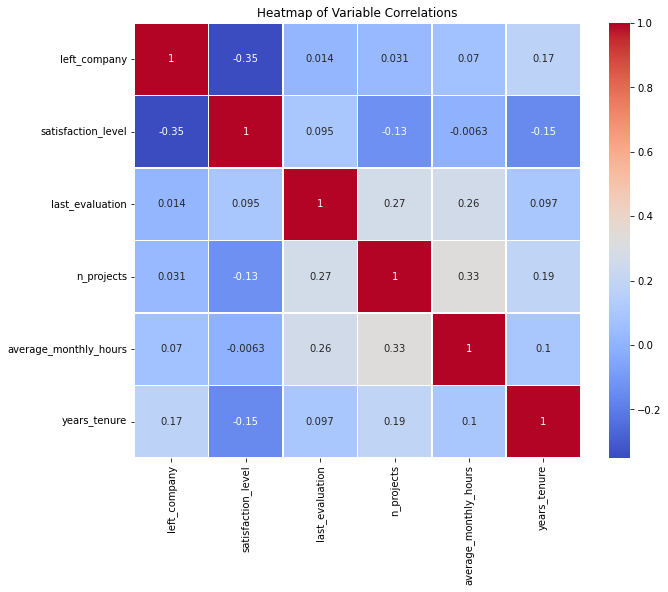

In [45]:
corr_matrix = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Variable Correlations')
plt.show()

💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]
There is labeled data, and there is a binary outcome variable.

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]
Logistic regression models categorical dependent variables based on one or more independent variables.
A supervised machine learning model can used the labeled dataset to train algorithms to classify/predict outcomes.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [14]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X=df2[["satisfaction_level"]]
y=df2[["left_company"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=2)
classifier=LogisticRegression().fit(X_train2, y_train2)


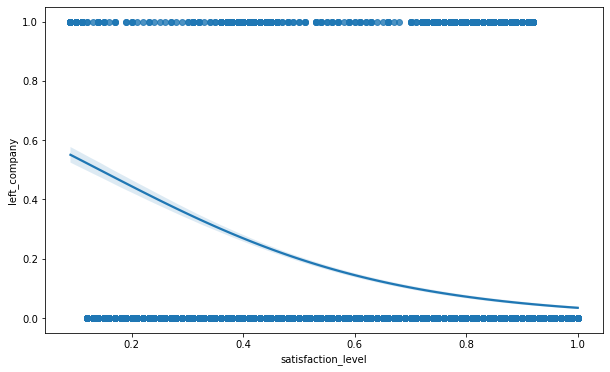

In [9]:
plt.figure(figsize=(10,6))
sns.regplot(x="satisfaction_level", y="left_company", data=df2, logistic=True)
plt.show()

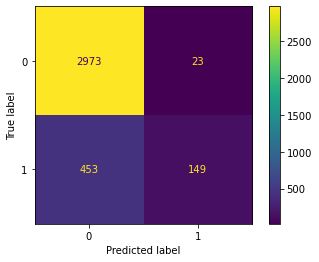

In [16]:
y_pred2 = classifier.predict(X_test2)
classifier.predict_proba(X_test2)[::,-1]

cm = metrics.confusion_matrix(y_test2, y_pred2, labels=classifier.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(values_format='')

In [21]:
print("precision score: ", "%.3f" %sklearn.metrics.precision_score(y_test, y_pred))
print("recall score: ", "%.3f" %sklearn.metrics.recall_score(y_test, y_pred))
print("accuracy score: ", "%.3f" %sklearn.metrics.accuracy_score(y_test, y_pred))
print("f1 score: ", "%.3f" %sklearn.metrics.f1_score(y_test, y_pred))

precision score:  0.861
recall score:  0.234
accuracy score:  0.863
f1 score:  0.368


In [17]:
target_names = ['Prediction = Stay', 'Prediction = Leave']
print(classification_report(y_test2, y_pred2, target_names=target_names))

                    precision    recall  f1-score   support

 Prediction = Stay       0.87      0.99      0.93      2996
Prediction = Leave       0.87      0.25      0.39       602

          accuracy                           0.87      3598
         macro avg       0.87      0.62      0.66      3598
      weighted avg       0.87      0.87      0.84      3598



In [29]:
import sklearn.metrics as metrics

roc_auc=metrics.roc_auc_score(y_test2, y_pred2)
roc_auc

0.6199157015555625

In [24]:
pip install --upgrade scikit-learn

     |████████████████████████████████| 24.8 MB 33.7 MB/s            
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


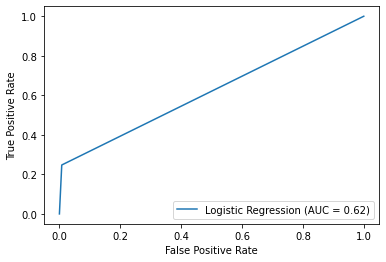

In [30]:
from sklearn.metrics import roc_curve, RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test2, y_pred2)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
roc_display.plot()

plt.show()

In [25]:
y=df2['left_company']
X=df2.copy()
X=X.drop('left_company', axis=1)

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.25, stratify=y, random_state=57)

#Baseline model
decision_tree = sklearn.tree.DecisionTreeClassifier(random_state=57)
decision_tree.fit(X_train, y_train)

#Make predictions on test data
dt_pred=decision_tree.predict(X_test)

#Generate performance metrics 
print("Accuracy: ", "%.3f" % accuracy_score(y_test, dt_pred))
print("Precision: ", "%.3f" % precision_score(y_test, dt_pred))
print("Accuracy: ", "%.3f" % accuracy_score(y_test, dt_pred))
print("Accuracy: ", "%.3f" % accuracy_score(y_test, dt_pred))

Accuracy:  0.972
Precision:  0.904
Accuracy:  0.972
Accuracy:  0.972


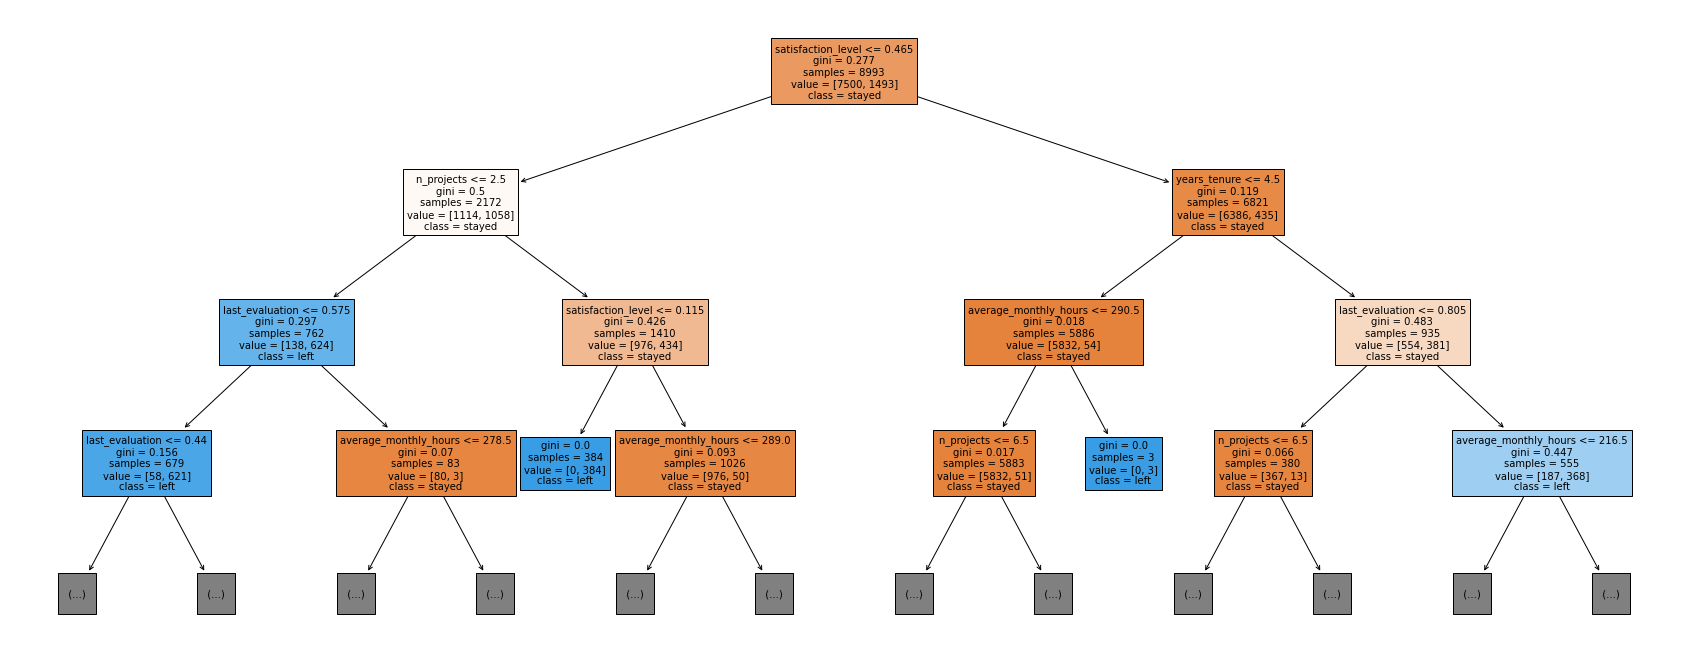

In [33]:
plt.figure(figsize=(30,12))
sklearn.tree.plot_tree(decision_tree, max_depth=3, fontsize=10, feature_names=X.columns,
         class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

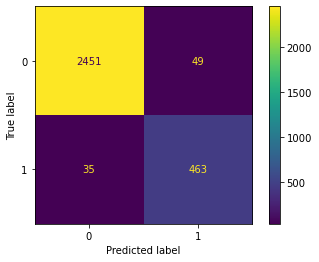

In [34]:
def conf_matrix_plot(model, x_data, y_data):
    model_pred=model.predict(x_data)
    cm=confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(values_format='')
    plt.show()
    
conf_matrix_plot(decision_tree, X_test, y_test)

Adjust via doing some hyperparameter tuning...

In [45]:
from sklearn.model_selection import GridSearchCV

tuned_decision_tree = sklearn.tree.DecisionTreeClassifier(random_state=57)
tree_para = {'max_depth': [2,3,4,5,8],
            'min_samples_leaf': [2,5,10],
            'min_samples_split': [2,4,6] }
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
clf = GridSearchCV(tuned_decision_tree, tree_para, scoring=scoring, cv=5, refit='roc_auc')
clf.fit(X_train, y_train)

clf.best_estimator_


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=57, splitter='best')

[Text(1187.6351351351352, 996.6, 'satisfaction_level <= 0.465\ngini = 0.277\nsamples = 8993\nvalue = [7500, 1493]'),
 Text(603.2432432432432, 815.4000000000001, 'n_projects <= 2.5\ngini = 0.5\nsamples = 2172\nvalue = [1114, 1058]'),
 Text(377.02702702702703, 634.2, 'last_evaluation <= 0.575\ngini = 0.297\nsamples = 762\nvalue = [138, 624]'),
 Text(150.8108108108108, 453.0, 'last_evaluation <= 0.44\ngini = 0.156\nsamples = 679\nvalue = [58, 621]'),
 Text(75.4054054054054, 271.79999999999995, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(226.2162162162162, 271.79999999999995, 'average_monthly_hours <= 125.5\ngini = 0.098\nsamples = 655\nvalue = [34, 621]'),
 Text(150.8108108108108, 90.59999999999991, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(301.6216216216216, 90.59999999999991, 'gini = 0.069\nsamples = 644\nvalue = [23, 621]'),
 Text(603.2432432432432, 453.0, 'average_monthly_hours <= 278.5\ngini = 0.07\nsamples = 83\nvalue = [80, 3]'),
 Text(527.8378378378378, 271.79999

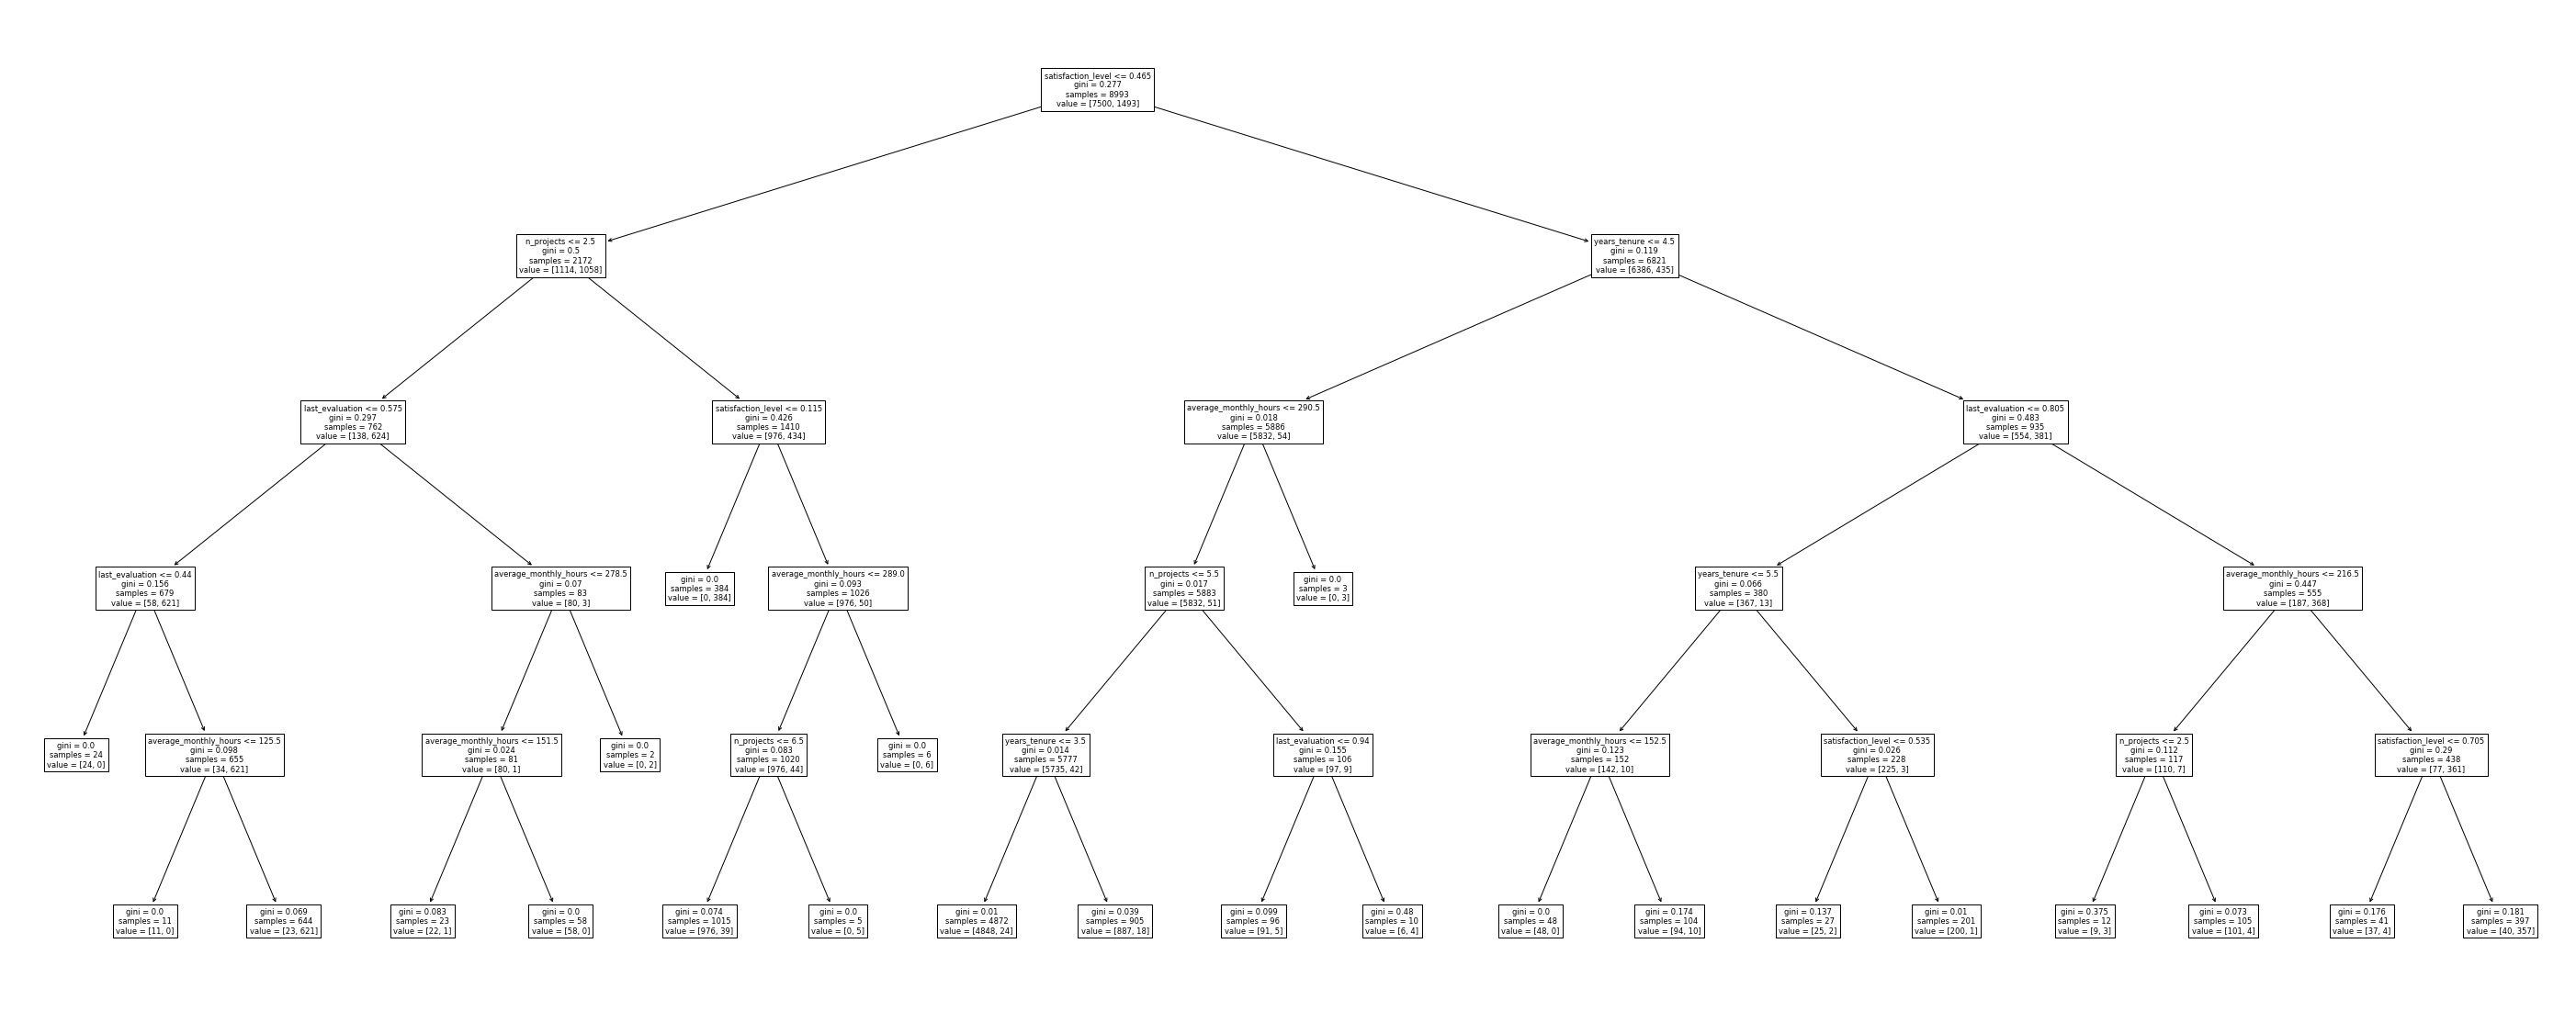

In [54]:
plt.figure(figsize=(50,20))
sklearn.tree.plot_tree(clf.best_estimator_, feature_names=X.columns)

In [51]:
def make_results(model_name, model_object):
    cv_results=pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(),:]
    f1=best_estimator_results.mean_test_f1
    recall=best_estimator_results.mean_test_recall
    precision=best_estimator_results.mean_test_precision
    accuracy=best_estimator_results.mean_test_accuracy
    roc_auc=best_estimator_results.mean_test_roc_auc
    table=pd.DataFrame()
    table=pd.DataFrame({'Model': [model_name],
                       'f1': [f1],
                       'Recall': [recall],
                       'Precision': [precision],
                       'Accuracy': [accuracy],
                       'Roc Auc': [roc_auc]})
    return table

result_table=make_results("tuned decision tree", clf)
result_table

,Model,f1,Recall,Precision,Accuracy,Roc Auc
0,tuned decision tree,0.944289,0.920282,0.96981,0.981986,0.964126


In [55]:
#Trying a random forest...

from sklearn.ensemble import RandomForestClassifier

In [56]:
rf=RandomForestClassifier(random_state=57)
cv_params= {'max_depth': [2,4,5], 
            'min_samples_leaf': [2,5,10], 
            'min_samples_split': [2,4,6],
            'max_features': [2,4],
            'n_estimators': [75, 150]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf_cv=GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='roc_auc')
rf_cv.fit(X_train, y_train)
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150}

In [77]:
rf_cv_results = make_results('random forest cv', rf_cv)

results = pd.concat([rf_cv_results, result_table])
results

,Model,f1,Recall,Precision,Accuracy,Roc Auc
0,random forest cv,0.937553,0.909564,0.967651,0.979873,0.979666
0,tuned decision tree,0.944289,0.920282,0.969810,0.981986,0.964126


In [ ]:
#Now let's try tuning hyperparameters with a separate validation dataset...


In [64]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=57)

split_index=[0 if x in X_val.index else -1 for x in X_train.index]

from sklearn.model_selection import PredefinedSplit
custom_split=PredefinedSplit(split_index)

rf_val=GridSearchCV(rf, cv_params, scoring=scoring, cv=custom_split, refit='roc_auc')
rf_val.fit(X_train, y_train)

rf_val.best_params_

{'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 150}

In [78]:
rf_val_results = make_results('random forest validated', rf_val)
results2=pd.concat([rf_val_results, results])
results2

,Model,f1,Recall,Precision,Accuracy,Roc Auc
0,random forest validated,0.946827,0.923077,0.971831,0.982768,0.989868
0,random forest cv,0.937553,0.909564,0.967651,0.979873,0.979666
0,tuned decision tree,0.944289,0.920282,0.969810,0.981986,0.964126


In [69]:
#Lastly, try the XGBoost
from xgboost import XGBClassifier
from xgboost import plot_importance


In [70]:
xgb = XGBClassifier(objective='binary:logistic', random_state=57)
cv_params2= {'max_depth': [2,5], 
            'min_child_weight': [1,3,5],
            'n_estimators': [75, 150]}
xgb_cv=GridSearchCV(xgb, cv_params2, scoring=scoring, cv=5, refit='roc_auc')
xgb_cv.fit(X_train,y_train)

print('best params: ', xgb_cv.best_params_)

best params:  {'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 150}


In [101]:
xgb_cv_results = make_results('xgboost cv', xgb_cv)
results3 = pd.concat([xgb_cv_results, results2]).sort_values(by=['Roc Auc'], ascending=False)
results3

,Model,f1,Recall,Precision,Accuracy,Roc Auc
0,random forest validated,0.946827,0.923077,0.971831,0.982768,0.989868
0,xgboost cv,0.945113,0.916938,0.975217,0.982319,0.982267
0,random forest cv,0.937553,0.909564,0.967651,0.979873,0.979666
0,tuned decision tree,0.944289,0.920282,0.969810,0.981986,0.964126


In [83]:
#Model selection...

from xgboost import plot_importance

ROC AUC score on final model (random forest validated):  0.9574473895582328


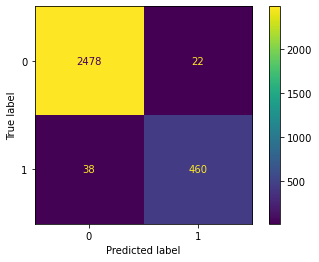

In [102]:
rf_val_preds = rf_val.predict(X_test)

print('ROC AUC score on final model (random forest validated): ', sklearn.metrics.roc_auc_score(y_test, rf_val_preds))

conf_matrix_plot(rf_val, X_test, y_test)


In [87]:
rfval_importances = pd.DataFrame(rf_val.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], index=X.columns)

rfval_importances = rfval_importances.sort_values(by='gini_importance', ascending=False)

rfval_importances = rfval_importances[rfval_importances['gini_importance'] != 0]

rfval_importances

,gini_importance
satisfaction_level,0.488689
n_projects,0.193640
years_tenure,0.119606
last_evaluation,0.119058
average_monthly_hours,0.079006


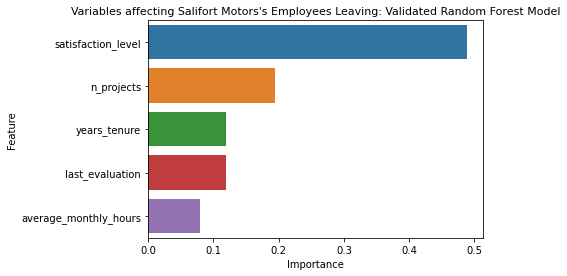

In [95]:
sns.barplot(data=rfval_importances, x="gini_importance", y=rfval_importances.index)
plt.title("Variables affecting Salifort Motors's Employees Leaving: Validated Random Forest Model", fontsize=11)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

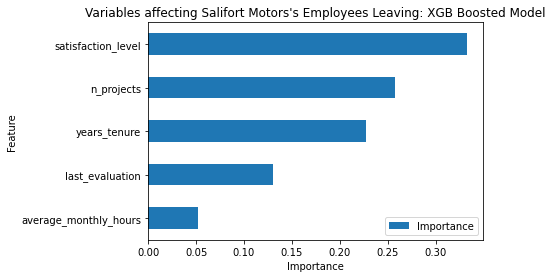

In [100]:
# Get feature importances
feat_importance = xgb_cv.best_estimator_.feature_importances_

indices_top5 = np.argpartition(rf_val.best_estimator_.feature_importances_, -5)[-5:]
feat_importance = feat_importance[indices_top5]
features = X.columns[indices_top5]

xgb_df = pd.DataFrame({"Feature":features,"Importance":feat_importance})

xgb_sorted = xgb_df.sort_values("Importance")

fig = plt.figure()

ax1 = fig.add_subplot(111)

xgb_sorted.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Variables affecting Salifort Motors's Employees Leaving: XGB Boosted Model", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

Employee satisfaction level is highly associated with the employee's decision to stay or leave the company.
Other variables that affect the decision to stay/leave and/or affect employee satisfaction level include: number of projects, tenure, hours worked.

If making an intervention on employees to improve retention rates of employees, focus on: keeping projects between 3-5 (not too much and not too little); employees that have worked for the company for 3-5 years; employees working too little (<167 hours) or too much (>210 hours).

The model can be improved with other hyperparameters, but at the cost of computing power and time. The dataset itself should be questioned given how it was made and the odd patterns that it contains.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]
See metrics in step 3.

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]
Employee satisfaction level is highly associated with the employee's decision to stay or leave the company.
Other variables that affect the decision to stay/leave and/or affect employee satisfaction level include: number of projects, tenure, hours worked.

If making an intervention on employees to improve retention rates of employees, focus on: keeping projects between 3-5 (not too much and not too little); employees that have worked for the company for 3-5 years; employees working too little (<167 hours) or too much (>210 hours).

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.